<a href="https://colab.research.google.com/github/MelinaNk/PhD/blob/Rainfed_STGR/DSSAT_RESULTS_50_STGR_P1P2P3_GEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%%script echo skipping
#Mount my Google Drive in the Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#%%script echo skipping
#@title Βιβλιοθήκες και φάκελοι αρχείων
import pandas as pd
import os
import numpy as np
os.chdir('/content/drive/MyDrive/Comparisons')

#decrease='original'
decrease='plus_5%'
#decrease='plus_10%'
#decrease='plus_15%'
#decrease='minus_10%'
pdate='Dec_01_'+decrease

DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED' #φάκελος με τα αποτελέσματα από το DSSAT
os.makedirs(DSSAT_directory, exist_ok=True)

DSSAT_summary_files_origin = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Original' #φάκελος με τα αποτελέσματα από το DSSAT τα αρχικά του EUROCORDEX σε csv
os.makedirs(DSSAT_summary_files_origin, exist_ok=True)

DSSAT_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate #φάκελος με τα αποτελέσματα από το DSSAT  του EUROCORDEX
os.makedirs(DSSAT_summary_files_origin, exist_ok=True)

DSSAT_meteo_summary_files_origin = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Meteo/Original' #φάκελος με τα αποτελέσματα από το DSSAT τα αρχικά του METEO σε csv
os.makedirs(DSSAT_meteo_summary_files_origin, exist_ok=True)

DSSAT_meteo_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Meteo' #φάκελος με τα αποτελέσματα από το DSSAT του METEO
os.makedirs(DSSAT_meteo_summary_files, exist_ok=True)

In [ ]:
#%%script echo skipping
#@title Δημιουργία συγκεντρωτικού αρχείου EUROCORDEX με τα αποτελέσματα απο το DSSAT (διαχωρισμός σε top50 και low50)
import pandas as pd
import os
import numpy as np
os.chdir('/content/drive/MyDrive/Comparisons')



DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

DSSAT_summary_files_origin = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Original'
os.makedirs(DSSAT_summary_files_origin, exist_ok=True)

DSSAT_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate
os.makedirs(DSSAT_summary_files_origin, exist_ok=True)

# List all csv files in the directory
csv_files = [file for file in os.listdir(DSSAT_summary_files_origin) if file.endswith('.csv')]

# Process each csv file
for csv_file in sorted(csv_files):
    # Step 1: Read each csv file with the first row as column names
    csv_path = os.path.join(DSSAT_summary_files_origin, csv_file)
    csv_path_2 = os.path.join(DSSAT_summary_files, csv_file)
    df = pd.read_csv(csv_path, header=0)
    # Filter out rows where TRNO is 1, 2, or 3
    df = df[~df['TRNO'].isin([1, 2, 3])]

    # Step 2: Keep only specified columns by index
    selected_columns_indices = [7, 10, 12, 13, 14, 15, 16, 17, 20,1]
    df = df.iloc[:, selected_columns_indices]

    # Step 3: Add a new column "Year" after the 2nd column
    df.insert(2, "Year", df.iloc[:, 2].astype(str).str[:4])

    # Step 4: Rename the first column to "EXNAME" and the second column to "WSTA"
    df = df.rename(columns={df.columns[0]: 'EXNAME', df.columns[1]: 'WSTA'})

    # Step 5: Add a new column "Scenario" based on WSTA.... values
    df['Scenario'] = df['WSTA'].apply(lambda x: 'rcp26' if '26' in str(x) else ('rcp45' if '45' in str(x) else ('rcp85' if '85' in str(x) else None)))

    # Step 6: Add a new column "Climate_model" based on the last two digits from the "WSTA" column
    df['Climate_model'] = 'Climate model ' + df['WSTA'].astype(str).apply(lambda x: x[-2:])

    # Conditions for rcp26
    conditions_rcp26 = [
        df['Climate_model'].astype(str).str.contains('Climate model 08|Climate model 09|Climate model 10|Climate model 11'),
        df['Climate_model'].astype(str).str.contains('Climate model 01|Climate model 02|Climate model 03|Climate model 04|Climate model 05|Climate model 06|Climate model 07')
    ]

    # Conditions for rcp45
    conditions_rcp45 = [
        df['Climate_model'].astype(str).str.contains('Climate model 01|Climate model 02|Climate model 06|Climate model 08|Climate model 09|Climate model 10|Climate model 11'),
        df['Climate_model'].astype(str).str.contains('Climate model 03|Climate model 04|Climate model 05|Climate model 07')
    ]

    # Conditions for rcp85
    conditions_rcp85 = [
        df['Climate_model'].astype(str).str.contains('Climate model 06|Climate model 08|Climate model 10|Climate model 11'),
        df['Climate_model'].astype(str).str.contains('Climate model 01|Climate model 02|Climate model 03|Climate model 04|Climate model 05|Climate model 07|Climate model 09')
    ]


    choices = ['top', 'low']

    # Use np.select to assign 'Rate' based on 'Scenario'
    df['Rate'] = np.select(
        [df['Scenario'] == 'rcp26', df['Scenario'] == 'rcp45', df['Scenario'] == 'rcp85'],
        [np.select(conditions_rcp26, ['top', 'low']),
        np.select(conditions_rcp45, ['top', 'low']),
        np.select(conditions_rcp85, ['top', 'low'])],
        default=None
    )
    df['Climate_model'] = df['Climate_model'].astype(str).str.replace('l 0', 'l ')


    # Step 7: Add a new column "Cultivar" based on the condition of the previous year's value
    df['Cultivar'] = np.where(
        df['TRNO'].isin([4, 7, 10, 13, 16,19,22,25,28,31,34]), 'Mexicali',
        np.where(df['TRNO'].isin([5, 8, 11, 14, 17,20,23,26,29,32,35]), 'Sifnos', 'Simeto')
    )

    # Step 10: Add new columns ADAT_day, MDAT_day, and EDAT_day next to the Year column
    df.insert(3, 'EDAT_day', df['EDAT'].astype(str).str[-3:])
    df.insert(4, 'ADAT_day', df['ADAT'].astype(str).str[-3:])
    df.insert(5, 'MDAT_day', df['MDAT'].astype(str).str[-3:])
    df.insert(6, 'HDAT_day', df['HDAT'].astype(str).str[-3:])

    df['Location'] = os.path.splitext(csv_file)[0]
    df = df.drop(columns=['TRNO'])


    # Step 8: Save back to the same csv file
    df.to_csv(csv_path_2, index=False)

In [ ]:
#%%script echo skipping
#@title Δημιουργία συγκεντρωτικού αρχείου METEO με τα αποτελέσματα απο το DSSAT (διαχωρισμός σε top50 και low50)
import pandas as pd
import os
import numpy as np
os.chdir('/content/drive/MyDrive/Comparisons')


DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

DSSAT_meteo_summary_files_origin = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Original'
os.makedirs(DSSAT_meteo_summary_files_origin, exist_ok=True)

DSSAT_meteo_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Meteo'
os.makedirs(DSSAT_meteo_summary_files, exist_ok=True)

# List all csv files in the directory
csv_files = [file for file in os.listdir(DSSAT_meteo_summary_files_origin) if file.endswith('.csv')]

# Process each csv file
for csv_file in sorted(csv_files):
    # Step 1: Read each csv file with the first row as column names
    csv_path = os.path.join(DSSAT_meteo_summary_files_origin, csv_file)
    csv_path_2 = os.path.join(DSSAT_meteo_summary_files, csv_file)
    df = pd.read_csv(csv_path, header=0)
    # Keep only rows where TRNO is 1, 2, or 3
    df = df[df['TRNO'].isin([1, 2, 3])]

    # Step 2: Assign cultivar based on 'TRNO' values
    df['Cultivar'] = np.where(df['TRNO'] == 1, 'Mexicali', np.where(df['TRNO'] == 2, 'Sifnos', 'Simeto'))



    # Step 2: Keep only specified columns by index
    selected_columns_indices = [7, 10, 12, 13, 14, 15, 16, 17, 20,85]
    df = df.iloc[:, selected_columns_indices]

    # Step 3: Add a new column "Year" after the 2nd column
    df.insert(2, "Year", df.iloc[:, 2].astype(str).str[:4])

    # Step 4: Rename the first column to "EXNAME" and the second column to "WSTA"
    df = df.rename(columns={df.columns[0]: 'EXNAME', df.columns[1]: 'WSTA'})

    # Step 5: Add a new column "Scenario"
    df['Scenario'] = 'Meteo'



    # Step 6: Add a new column "Climate_model" based on the last two digits from the "WSTA" column
    df['Climate_model'] = 'Meteo'

    df['Rate']='Observed'

    # Step 10: Add new columns ADAT_day, MDAT_day, and EDAT_day next to the Year column
    df.insert(3, 'EDAT_day', df['EDAT'].astype(str).str[-3:])
    df.insert(4, 'ADAT_day', df['ADAT'].astype(str).str[-3:])
    df.insert(5, 'MDAT_day', df['MDAT'].astype(str).str[-3:])
    df.insert(6, 'HDAT_day', df['HDAT'].astype(str).str[-3:])

    df['Location'] = os.path.splitext(csv_file)[0]


    # Move the 'Cultivar' column three columns to the right
    df.insert(18, 'Cultivar2', df['Cultivar'])

    # Drop the original 'Cultivar' column
    df.drop(columns=['Cultivar'], inplace=True)

    # Rename the 'Year' column to '6576rtfty'
    df.rename(columns={'Cultivar2': 'Cultivar'}, inplace=True)



    # Step 8: Save back to the same csv file
    df.to_csv(csv_path_2, index=False)

In [ ]:
#%%script echo skipping
#@title Δημιουργία συγκεντρωτικού αρχείου METEO και EUROCORDEX
import os
import pandas as pd

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)



DSSAT_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate
os.makedirs(DSSAT_summary_files_origin, exist_ok=True)



DSSAT_meteo_summary_files = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/SUMMARY_FILES/'+pdate+'/Meteo'
os.makedirs(DSSAT_meteo_summary_files, exist_ok=True)

# List to store individual DataFrames
dfs = []

# Loop through each CSV file
for csv_file in sorted(os.listdir(DSSAT_meteo_summary_files)):
    if csv_file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(DSSAT_meteo_summary_files, csv_file)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Loop through each CSV file
for csv_file in sorted(os.listdir(DSSAT_summary_files)):
    if csv_file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(DSSAT_summary_files, csv_file)
        df = pd.read_csv(file_path)
        dfs.append(df)



# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Filter out rows where Year is not 2023
combined_df = combined_df[combined_df['Year'] != 2023]
combined_df = combined_df[combined_df['Year'] != 2024]
# Filter out rows where HWAM is -99
combined_df = combined_df[combined_df['HWAM'] != -99]
combined_df = combined_df[combined_df['EDAT_day'] != -99]

# Display the combined DataFrame
print(combined_df.head())

# Save the combined DataFrame to a new CSV file
file_path_result = os.path.join(DSSAT_directory, 'combined_data_'+pdate+'.csv')
combined_df.to_csv(file_path_result, index=False)


     EXNAME      WSTA  Year  EDAT_day  ADAT_day  MDAT_day  HDAT_day     SDAT  \
0  MXSF2623  STMT0623  2006         3       110       149       239  2006335   
1  MXSF2623  STMT0623  2007       359       105       148       238  2007335   
2  MXSF2623  STMT0623  2008       348       110       151       241  2008335   
3  MXSF2623  STMT0623  2009       342       103       144       234  2009335   
4  MXSF2623  STMT0623  2010       355       115       158       248  2010335   

      PDAT     EDAT     ADAT     MDAT     HDAT  HWAM Scenario Climate_model  \
0  2006335  2007003  2007110  2007149  2007239  3608    Meteo         Meteo   
1  2007335  2007359  2008105  2008148  2008238  2300    Meteo         Meteo   
2  2008335  2008348  2009110  2009151  2009241  3344    Meteo         Meteo   
3  2009335  2009342  2010103  2010144  2010234  2966    Meteo         Meteo   
4  2010335  2010355  2011115  2011158  2011248  4125    Meteo         Meteo   

       Rate  Cultivar         Location  
0  

In [ ]:
#%%script echo skipping
#@title Προσθήκη στήλης με τα υψόμετρα των περιοχών
import pandas as pd

# Read the existing CSV file
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)


combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_'+pdate+'.csv'
df = pd.read_csv(combined_file_path)

# Dictionary mapping locations to elevations
elevation_mapping = {'Amfikleia_urban': 440, 'Polydroso': 350, 'Amfikleia_rural': 245, 'Lefkochori': 133,
                     'Livadeia': 120, 'Kopaida': 98, 'Antikyra': 336, 'Kyriaki': 760}

# Add 'Elevation' column based on the mapping
df['Elevation'] = df['Location'].map(elevation_mapping)

# Save the updated DataFrame to a new CSV file
updated_combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_'+pdate+'.csv'
df.to_csv(updated_combined_file_path, index=False)

# Display the updated DataFrame
print(df.head())


     EXNAME      WSTA  Year  EDAT_day  ADAT_day  MDAT_day  HDAT_day     SDAT  \
0  MXSF2623  STMT0623  2006         3       110       149       239  2006335   
1  MXSF2623  STMT0623  2007       359       105       148       238  2007335   
2  MXSF2623  STMT0623  2008       348       110       151       241  2008335   
3  MXSF2623  STMT0623  2009       342       103       144       234  2009335   
4  MXSF2623  STMT0623  2010       355       115       158       248  2010335   

      PDAT     EDAT     ADAT     MDAT     HDAT  HWAM Scenario Climate_model  \
0  2006335  2007003  2007110  2007149  2007239  3608    Meteo         Meteo   
1  2007335  2007359  2008105  2008148  2008238  2300    Meteo         Meteo   
2  2008335  2008348  2009110  2009151  2009241  3344    Meteo         Meteo   
3  2009335  2009342  2010103  2010144  2010234  2966    Meteo         Meteo   
4  2010335  2010355  2011115  2011158  2011248  4125    Meteo         Meteo   

       Rate  Cultivar         Location  Elev

In [ ]:
#@title Συνδυασμός αρχείων αποτελεσμάτων διαφορετικών planting dates σε ενα και δημιουργία στήλης pdate
#%%script echo skipping
import pandas as pd

# Define the file paths
file_paths = [
    '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_Dec_01_minus_10%.csv',
    '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_Dec_01_original.csv',
    '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_Dec_01_plus_5%.csv',
    '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_Dec_01_plus_10%.csv',
    '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_Dec_01_plus_15%.csv'
]

# Load the CSV files into Pandas DataFrames, add PDATE column
dfs = []
for file_path in file_paths:
    # Extract the last 6 digits from the filename to use as PDATE
    pdate = 'Dec_01'
    # Extract the substring between "Dec_01" and ".csv"
    start_idx = file_path.find('Dec_01') + len('Dec_01')
    end_idx = file_path.find('.csv')
    decr = file_path[start_idx:end_idx].strip('_')

    # Load CSV into DataFrame
    df = pd.read_csv(file_path)

    # Add PDATE column
    df['PDATE'] = pdate
    df['P1P2P3'] = decr
    # Replace underscores with spaces in PDATE column
    df['PDATE'] = df['PDATE'].str.replace('_', ' ')
    df['P1P2P3'] = df['P1P2P3'].str.replace('_', ' ')

    # Add Source column
    df['Source'] = df['Scenario'].apply(lambda x: 'Meteo' if x == 'Meteo' else 'EuroCordex')

    # Append DataFrame to list
    dfs.append(df)

# Combine the DataFrames
combined_data = pd.concat(dfs)
filtered_combined_data = combined_data[combined_data['ADAT_day'] != -99]
filtered_combined_data = combined_data[combined_data['MDAT_day'] != -99]

# Filter rows where Scenario is 'Meteo' and remove duplicates
#meteo_data = combined_data[combined_data['Scenario'] == 'Meteo'].drop_duplicates()

# Write the filtered Meteo data to a new CSV file
combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'
filtered_combined_data.to_csv(combined_file_path, index=False)

print("Filtered Meteo data with PDATE saved successfully at:", combined_file_path)


Filtered Meteo data with PDATE saved successfully at: /content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv


In [ ]:
%%script echo skipping
#@title BOXPLOTS για κάθε Rate (top, low, all, observed)
import pandas as pd
import os
os.chdir('/content/drive/MyDrive/Comparisons')


import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_'+pdate+'.csv'
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/'+pdate
df = pd.read_csv(combined_file_path)

# Create a new DataFrame by concatenating Rate=top and Rate=low rows
new_df = pd.concat([df[df['Rate'] == 'top'], df[df['Rate'] == 'low']], ignore_index=True)

# Replace all values in the 'Rate' column with 'all'
df.loc[df['Rate'] != 'Observed', 'Rate'] = 'all'
# Create a new DataFrame by concatenating Rate=top and Rate=low rows
new_df2 = pd.concat([new_df,df], ignore_index=True)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Custom palette with 'top' as Orange and 'low' as Blue
custom_palette = {'top': 'orange', 'low': 'blue', 'Observed': 'green', 'all': 'grey'}

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Iterate over variables
for i, column in enumerate(['ADAT_day', 'MDAT_day', 'HWAM'], start=1):
    plt.figure(figsize=(12, 6))

    # Define hue_order to ensure the correct order in the legend
    hue_order = ['top', 'low', 'all','Observed']

    ax = sns.boxplot(x='Scenario', y=column, hue='Rate', data=new_df2, palette=custom_palette, hue_order=hue_order, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 4}, width=0.5, dodge=True)

    # Draw horizontal grid lines inside the plot area
    ax.yaxis.grid(True)
    plt.title(f'{variable_labels[column]} for each Scenario and Rate')
    plt.xlabel('Scenario')
    plt.ylabel(variable_labels[column])
    plt.legend(title='Rate')


    # Save the boxplot as an image in the same path as the CSV file
    boxplot_filename = f'{column}_boxplot.png'
    boxplot_filepath = os.path.join(graphs_path, boxplot_filename)
    plt.savefig(boxplot_filepath, bbox_inches='tight')

    plt.show()

skipping


In [ ]:
%%script echo skipping
#@title BOXPLOTS για κάθε Rate (top, low, all, observed) με x axis --> PDATE
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs'
df = pd.read_csv(combined_file_path)

# Create a new DataFrame by concatenating Rate=top and Rate=low rows
new_df = pd.concat([df[df['Rate'] == 'top'], df[df['Rate'] == 'low']], ignore_index=True)

# Replace all values in the 'Rate' column with 'all'
df.loc[df['Rate'] != 'Observed', 'Rate'] = 'all'
# Create a new DataFrame by concatenating Rate=top and Rate=low rows
new_df2 = pd.concat([new_df, df], ignore_index=True)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Custom palette with 'top' as Orange and 'low' as Blue
custom_palette = {'top': 'orange', 'low': 'blue', 'Observed': 'green', 'all': 'grey'}

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(24, 6), sharey=False)

# Define hue_order to ensure the correct order in the legend
hue_order = ['top', 'low', 'all', 'Observed']

# Iterate over variables and subplots
for i, (column, ax) in enumerate(zip(['ADAT_day', 'MDAT_day', 'HWAM'], axs), start=1):
    sns.boxplot(x='PDATE', y=column, hue='Rate', data=new_df2, palette=custom_palette, ax=ax,
                hue_order=hue_order, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 4},
                width=0.5, dodge=True)

    # Draw horizontal grid lines inside the plot area
    ax.yaxis.grid(True)
    ax.set_title(f'{variable_labels[column]} for each PDATE and Rate')
    ax.set_xlabel('PDATE')
    ax.set_ylabel(variable_labels[column])
    ax.legend(title='Rate',loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot with subplots as an image in the same path as the CSV file
subplots_filename = 'combined_boxplots_pdate.png'
subplots_filepath = os.path.join(graphs_path, subplots_filename)
plt.savefig(subplots_filepath, bbox_inches='tight')

plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Regression Combined plots για κάθε Rate (top, low, all, observed) σε σχέση με το Elevation για ολα τα pdate
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to calculate metrics
def plot_regression_line_and_equation(x, y, label, color, ax):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = model.predict(line_x.reshape(-1, 1))

    # Plot regression line
    ax.plot(line_x, line_y, color=color, linestyle='--', label=f'{label} Line')

    # Display equation with custom position
    slope = model.coef_[0]
    intercept = model.intercept_
    equation = f"{label}: {slope:.4f}*Elevation + {intercept:.2f}"
    return equation

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs'
df = pd.read_csv(combined_file_path)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Custom palette with 'top' as green and 'low' as deep red
custom_palette = {'top': 'green', 'low': '#8B0000', 'Observed':'orange'}

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Generate separate plots for each scenario
for scenario in scenarios:
    fig, axes = plt.subplots(1, len(variable_labels), figsize=(18, 6), sharex=True)

    for column_idx, (column, ylabel) in enumerate(variable_labels.items()):
        ax = axes[column_idx]

        # Calculate sizes for each scenario
        size_top = len(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)])
        size_low = len(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)])
        size_observed = len(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')])


        # Create scatter plot for 'top' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)],
                        color='green', label=f'Top Rate (n={size_top})', s=80, alpha=0.7, edgecolor='green', marker='o', ax=ax)
        equation_top = plot_regression_line_and_equation(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)]['Elevation'],
                                                         df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)][column],
                                                         'Top', 'green', ax)

        # Create scatter plot for 'low' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)],
                        color='#8B0000', label=f'Low Rate (n={size_low})', s=20, alpha=0.7, edgecolor='#8B0000', marker='o', ax=ax)
        equation_low = plot_regression_line_and_equation(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]['Elevation'],
                                                         df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)][column],
                                                         'Low', '#8B0000', ax)

        # Create scatter plot for 'Observed' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')],
                        color='orange', label=f'Observed (n={size_observed})', s=30, alpha=0.5, edgecolor='black', marker='d', ax=ax)
        equation_observed = plot_regression_line_and_equation(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')]['Elevation'],
                                                              df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')][column],
                                                              'Observed', 'orange', ax)

        # Calculate and plot combined 'all' Rate
        all_df = np.concatenate([df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)],
                                 df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]])
        all_df = pd.DataFrame(all_df, columns=df.columns)  # Convert to DataFrame
        all_df['Rate'] = 'all'
        equation_all = plot_regression_line_and_equation(all_df['Elevation'], all_df[column],
                                                         'All data', 'gray', ax)


        ax.set_title(f'{ylabel} - {scenario}')
        ax.set_xlabel('Elevation (m)')
        ax.set_ylabel(ylabel)



        # Set x-axis ticks as integers and rotate them by 45 degrees
        ax.set_xticks(df['Elevation'].unique().astype(int))
        ax.set_xticklabels(df['Elevation'].unique().astype(int), rotation=45, fontsize=8)

        # Make y-axis tick labels smaller
        ax.tick_params(axis='y', labelsize=8)

        # Adding the equations as annotations
        ax.annotate(equation_top, xy=(0.4, 0.98), xycoords='axes fraction', fontsize=9, color='green', verticalalignment='top')
        ax.annotate(equation_low, xy=(0.4, 0.95), xycoords='axes fraction', fontsize=9, color='#8B0000', verticalalignment='top')
        ax.annotate(equation_observed, xy=(0.4, 0.89), xycoords='axes fraction', fontsize=9, color='orange', verticalalignment='top')
        ax.annotate(equation_all, xy=(0.4, 0.92), xycoords='axes fraction', fontsize=9, color='gray', verticalalignment='top')


        # Adjust legend to bottom right
        ax.legend(loc='lower right', prop={'size': 8})

        # Adjust y-axis limits to add space at the top
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min- 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))  # Add 10% extra space at the top


    plt.tight_layout()

    # Save the combined plot for the current scenario
    plot_filename = f'combined_{scenario}_Elevation_scatter.png'
    plot_filepath = os.path.join(graphs_path, plot_filename)
    plt.savefig(plot_filepath, dpi=600)
    plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Regression Combined plots για τις μετεωρολογικές τιμές για κάθε Rate (top, low, all, observed) σε σχέση με το Elevation για ολα τα pdate
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to calculate metrics
def plot_regression_line_and_equation(x, y, label, color, ax):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = model.predict(line_x.reshape(-1, 1))

    # Plot regression line
    ax.plot(line_x, line_y, color=color, linestyle='--', label=f'{label} Line')

    # Display equation with custom position
    slope = model.coef_[0]
    intercept = model.intercept_
    equation = f"{label}: {slope:.4f}*Elevation + {intercept:.2f}"
    return equation

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs'
df = pd.read_csv(combined_file_path)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Custom palette with 'top' as green and 'low' as deep red
custom_palette = {'top': 'green', 'low': '#8B0000', 'Observed':'orange'}

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Generate separate plots for each scenario
for scenario in scenarios:
    fig, axes = plt.subplots(1, len(variable_labels), figsize=(18, 6), sharex=True)

    for column_idx, (column, ylabel) in enumerate(variable_labels.items()):
        ax = axes[column_idx]

        # Calculate sizes for each scenario
        size_top = len(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)])
        size_low = len(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)])
        size_observed = len(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')])


        # Create scatter plot for 'top' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)],
                        color='green', label=f'Top Rate (n={size_top})', s=80, alpha=0.7, edgecolor='green', marker='o', ax=ax)
        equation_top = plot_regression_line_and_equation(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)]['Elevation'],
                                                         df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)][column],
                                                         'Top', 'green', ax)

        # Create scatter plot for 'low' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)],
                        color='#8B0000', label=f'Low Rate (n={size_low})', s=20, alpha=0.7, edgecolor='#8B0000', marker='o', ax=ax)
        equation_low = plot_regression_line_and_equation(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]['Elevation'],
                                                         df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)][column],
                                                         'Low', '#8B0000', ax)

        # Create scatter plot for 'Observed' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')],
                        color='orange', label=f'Observed (n={size_observed})', s=30, alpha=0.5, edgecolor='black', marker='d', ax=ax)
        equation_observed = plot_regression_line_and_equation(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')]['Elevation'],
                                                              df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')][column],
                                                              'Observed', 'orange', ax)

        # Calculate and plot combined 'all' Rate
        all_df = np.concatenate([df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)],
                                 df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]])
        all_df = pd.DataFrame(all_df, columns=df.columns)  # Convert to DataFrame
        all_df['Rate'] = 'all'
        equation_all = plot_regression_line_and_equation(all_df['Elevation'], all_df[column],
                                                         'All data', 'gray', ax)


        ax.set_title(f'{ylabel} - {scenario}')
        ax.set_xlabel('Elevation (m)')
        ax.set_ylabel(ylabel)



        # Set x-axis ticks as integers and rotate them by 45 degrees
        ax.set_xticks(df['Elevation'].unique().astype(int))
        ax.set_xticklabels(df['Elevation'].unique().astype(int), rotation=45, fontsize=8)

        # Make y-axis tick labels smaller
        ax.tick_params(axis='y', labelsize=8)

        # Adding the equations as annotations
        ax.annotate(equation_top, xy=(0.4, 0.98), xycoords='axes fraction', fontsize=9, color='green', verticalalignment='top')
        ax.annotate(equation_low, xy=(0.4, 0.95), xycoords='axes fraction', fontsize=9, color='#8B0000', verticalalignment='top')
        ax.annotate(equation_observed, xy=(0.4, 0.89), xycoords='axes fraction', fontsize=9, color='orange', verticalalignment='top')
        ax.annotate(equation_all, xy=(0.4, 0.92), xycoords='axes fraction', fontsize=9, color='gray', verticalalignment='top')


        # Adjust legend to bottom right
        ax.legend(loc='lower right', prop={'size': 8})

        # Adjust y-axis limits to add space at the top
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min- 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))  # Add 10% extra space at the top


    plt.tight_layout()

    # Save the combined plot for the current scenario
    plot_filename = f'combined_{scenario}_Elevation_scatter.png'
    plot_filepath = os.path.join(graphs_path, plot_filename)
    plt.savefig(plot_filepath, dpi=600)
    plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Probability density function για κάθε Rate (top, low, all, observed) για ολα τα pdate

#We can use the Probability Density Function (PDF) to understand how likely it is for a particular date of anthesis to occur within that group.
#Here's how the explanation would go:
#Understanding Probability: Probability measures how likely an event is to occur. In our case, the event is a particular date of anthesis occurring for a plant in the group.
#Density Function: The PDF provides us with a way to understand the likelihood of different anthesis dates occurring. It gives us insight into how the data is spread out across different dates.
#Graphical Representation: When we plot the PDF on a graph, the x-axis represents the possible anthesis dates, and the y-axis represents the likelihood of each date occurring.
#Area under the Curve: The area under the PDF curve represents the total probability of all possible anthesis dates. If we integrate (find the area under) the entire PDF curve, we'd get a value of 1, indicating that one of the possible anthesis dates is guaranteed to occur.
#Interpreting Peaks and Valleys: Peaks in the PDF indicate where anthesis dates are most likely to occur, while valleys indicate where they are less likely.
#So, in summary, the PDF helps us understand the distribution of anthesis dates and the likelihood of different dates occurring within that distribution.

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set directory
os.chdir('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED')

# Read combined data file
combined_file_path = 'combined_data_with_pdate.csv'
df = pd.read_csv(combined_file_path)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Create directory for saving plots
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/PDF_Graphs'
os.makedirs(graphs_path, exist_ok=True)

# Loop through scenarios
for scenario in scenarios:
    # Create subplots for each variable
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Loop through variables
    for i, column in enumerate(['ADAT_day', 'MDAT_day', 'HWAM']):
        size_top = len(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)])
        size_low = len(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)])
        size_observed = len(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')& (df['PDATE'] == 'Dec 01')])

        ax = axes[i]
        all_df = np.concatenate([df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)], df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]])
        all_df = pd.DataFrame(all_df, columns=df.columns)  # Convert to DataFrame
        all_df['Rate'] = 'all'

        size_all = len(all_df[(all_df['Rate'] == 'all') & (all_df['Scenario'] == scenario)])
        # Plot PDF for 'top' rate
        sns.kdeplot(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)][column], label=f'top (n={size_top})', color='orange', linewidth=2, ax=ax)

        # Plot PDF for 'low' rate
        sns.kdeplot(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)][column], label=f'low (n={size_low})', color='blue', linewidth=2, ax=ax)

        # Plot PDF for 'all' rate
        sns.kdeplot(all_df[(all_df['Rate'] == 'all') & (all_df['Scenario'] == scenario)][column], label=f'all (n={size_all})', color='grey', linewidth=2, ax=ax)

        # Plot PDF for 'Observed' rate
        sns.kdeplot(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')][column], label=f'Observed (n={size_observed})', color='green', linewidth=2, ax=ax)

        ax.set_title(variable_labels[column])
        ax.set_xlabel(variable_labels[column])
        ax.set_ylabel('Probability Density')
        ax.legend(title="Rate")
        ax.grid(True)

    plt.suptitle('Probability Density Functions for Scenario: ' + scenario)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot
    plot_filename = 'PDF_all_variables_' + scenario + '.png'
    plot_filepath = os.path.join(graphs_path, plot_filename)
    plt.savefig(plot_filepath, dpi=600)
    plt.show()
    plt.close()


skipping


In [ ]:
%%script echo skipping
#@title Cumulative Distribution Function για κάθε Rate (top, low, all, observed) για ολα τα pdate
#Cumulative Distribution Function (CDF) in simple terms:
#Understanding Cumulative Probability: The Cumulative Distribution Function (CDF) gives us the probability that a random variable (such as anthesis date) will take on a value less than or equal to a certain point.
#Accumulation of Probability: Unlike the Probability Density Function (PDF), which shows the likelihood of each individual value, the CDF shows how probability accumulates as you move along the range of possible values.
#Graphical Representation: When we plot the CDF on a graph, the x-axis represents the possible values (anthesis dates), and the y-axis represents the cumulative probability up to that point.
#Interpreting the Curve: As we move along the x-axis, the CDF increases from 0 to 1. This indicates the increasing likelihood of observing a value less than or equal to a certain point.
#Usefulness: The CDF is useful for understanding the entire distribution of a dataset and provides insights into the probability of observing values within a certain range.
#In essence, the CDF provides a comprehensive view of the probability distribution and helps us understand the likelihood of observing different values within that distribution.

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set directory
os.chdir('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED')

# Read combined data file
combined_file_path = 'combined_data_with_pdate.csv'
df = pd.read_csv(combined_file_path)

# List of scenarios
scenarios = ['rcp26', 'rcp45', 'rcp85']

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Create directory for saving plots
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/CDF_Graphs'
os.makedirs(graphs_path, exist_ok=True)

# Calculate size of 'Observed' rate once outside the loop
size_observed = len(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')& (df['PDATE'] == 'Dec 01')])
# Loop through scenarios
for scenario in scenarios:
    # Create subplots for each variable
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Loop through variables
    for i, column in enumerate(['ADAT_day', 'MDAT_day', 'HWAM']):
        # Size calculations for 'top' and 'low' rates
        size_top = len(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)])
        size_low = len(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)])

        # Combine 'top' and 'low' into 'all' DataFrame
        all_df = pd.concat([df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)],
                            df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)]])
        all_df['Rate'] = 'all'
        size_all = len(all_df)  # Total size of 'all'

        ax = axes[i]

        # Plot CDF for 'top' rate
        sns.kdeplot(df[(df['Rate'] == 'top') & (df['Scenario'] == scenario)][column], label=f'top (n={size_top})', color='orange', cumulative=True, linewidth=2, ax=ax)

        # Plot CDF for 'low' rate
        sns.kdeplot(df[(df['Rate'] == 'low') & (df['Scenario'] == scenario)][column], label=f'low (n={size_low})', color='blue', cumulative=True, linewidth=2, ax=ax)

        # Plot CDF for 'all' rate
        sns.kdeplot(all_df[column], label=f'all (n={size_all})', color='grey', cumulative=True, linewidth=2, ax=ax)

        # Plot CDF for 'Observed' rate (use pre-calculated size_observed)
        sns.kdeplot(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')][column], label=f'Observed (n={size_observed})', color='green', cumulative=True, linewidth=2, ax=ax)

        ax.set_title(variable_labels[column])
        ax.set_xlabel(variable_labels[column])
        ax.set_ylabel('Cumulative Density')
        ax.legend(title="Rate")
        ax.grid(True)

    plt.suptitle('Cumulative Distribution Functions for Scenario: ' + scenario)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot
    plot_filename = 'CDF_all_variables_' + scenario + '.png'
    plot_filepath = os.path.join(graphs_path, plot_filename)
    plt.savefig(plot_filepath, dpi=600)
    plt.show()
    plt.close()


skipping


In [ ]:
%%script echo skipping
#@title Kolmogorov-Smirnov test

# Ensure the necessary package is installed
!pip install python-docx
import pandas as pd
from docx import Document
from scipy.stats import ks_2samp
from docx.shared import RGBColor

# Path to the combined CSV file
file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'

# Read the combined CSV file into a Pandas DataFrame
combined_data = pd.read_csv(file_path)


# The combination to compare against other combinations
observed_meteo_combination = {'Rate': 'Observed', 'Scenario': 'Meteo'}

# Create a Word document
doc = Document()

# Assuming your CSV files have columns named 'ADAT', 'MDAT', and 'HWAM' containing the values to be compared
columns_to_compare = ['ADAT_day', 'MDAT_day', 'HWAM']

comparison_combinations = [
    {'Rate': 'top', 'Scenario': 'rcp26'},
    {'Rate': 'top', 'Scenario': 'rcp45'},
    {'Rate': 'top', 'Scenario': 'rcp85'},
    {'Rate': 'low', 'Scenario': 'rcp26'},
    {'Rate': 'low', 'Scenario': 'rcp45'},
    {'Rate': 'low', 'Scenario': 'rcp85'},
    {'Rate': 'all', 'Scenario': 'rcp26'},
    {'Rate': 'all', 'Scenario': 'rcp45'},
    {'Rate': 'all', 'Scenario': 'rcp85'}
]

# Create a combined group for 'top' and 'low' rates for each scenario
combined_group_all = pd.DataFrame()
for combination in comparison_combinations:
    if combination['Rate'] == 'all':
        group = combined_data[(combined_data['Scenario'] == combination['Scenario']) & (combined_data['Rate'] != 'Observed')]
    else:
        group = combined_data[(combined_data['Rate'] == combination['Rate']) & (combined_data['Scenario'] == combination['Scenario'])]
    combined_group_all = pd.concat([combined_group_all, group])

# Perform Kolmogorov-Smirnov test for every pair combination and for each column
for column in columns_to_compare:
    doc.add_heading(f"Kolmogorov-Smirnov test results for {column}:", level=1)

    # Get data for the observed_meteo_combination (group 1)
    group1 = combined_data[(combined_data['Rate'] == observed_meteo_combination['Rate']) & (combined_data['Scenario'] == observed_meteo_combination['Scenario'])][column]

    for comparison_combination in comparison_combinations:
        # Get data for the current comparison combination
        if comparison_combination['Rate'] == 'all':
            group2 = combined_group_all[(combined_group_all['Scenario'] == comparison_combination['Scenario'])][column]
        else:
            group2 = combined_data[(combined_data['Rate'] == comparison_combination['Rate']) & (combined_data['Scenario'] == comparison_combination['Scenario'])][column]

        # Perform Kolmogorov-Smirnov test
        ks_statistic, p_value = ks_2samp(group1, group2)

        # Add results to the Word document with bold text
        doc.add_heading(f"{observed_meteo_combination['Rate']}_{observed_meteo_combination['Scenario']} and {comparison_combination['Rate']}_{comparison_combination['Scenario']}:", level=2)
        doc.add_paragraph(f"KS-statistic: {ks_statistic:0.3e}")
        doc.add_paragraph(f"P-value: {p_value:0.3e}")

        # Make P-value bold
        p_value_paragraph = doc.add_paragraph()
        for run in p_value_paragraph.runs:
            run.bold = True

        # Check for significance
        alpha = 0.05
        significance_paragraph = doc.add_paragraph()
        if p_value < alpha:
            significance_paragraph.add_run(f"{p_value:0.3e} < alpha={alpha}")
            significance_paragraph.add_run("\n There are significant differences between the distributions.").font.color.rgb = RGBColor(255, 0, 0)
        else:
            significance_paragraph.add_run(f"{p_value:0.3e} > alpha={alpha}")
            significance_paragraph.add_run("\n There are no significant differences between the distributions.")

        doc.add_paragraph("-" * 60)

# Save the Word document
doc.save('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/ks_test_observed_meteo_vs_all_results.docx')


skipping


<ipython-input-80-3fac20cd5f15>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rate', y=variable, data=new_df2, palette=custom_palette, order=x_axis_order, showfliers=True, ax=ax,
<ipython-input-80-3fac20cd5f15>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rate', y=variable, data=new_df2, palette=custom_palette, order=x_axis_order, showfliers=True, ax=ax,
<ipython-input-80-3fac20cd5f15>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rate', y=variable, data=new_df2, palette=custom_palette, order=x_axis_order, showfliers=Tr

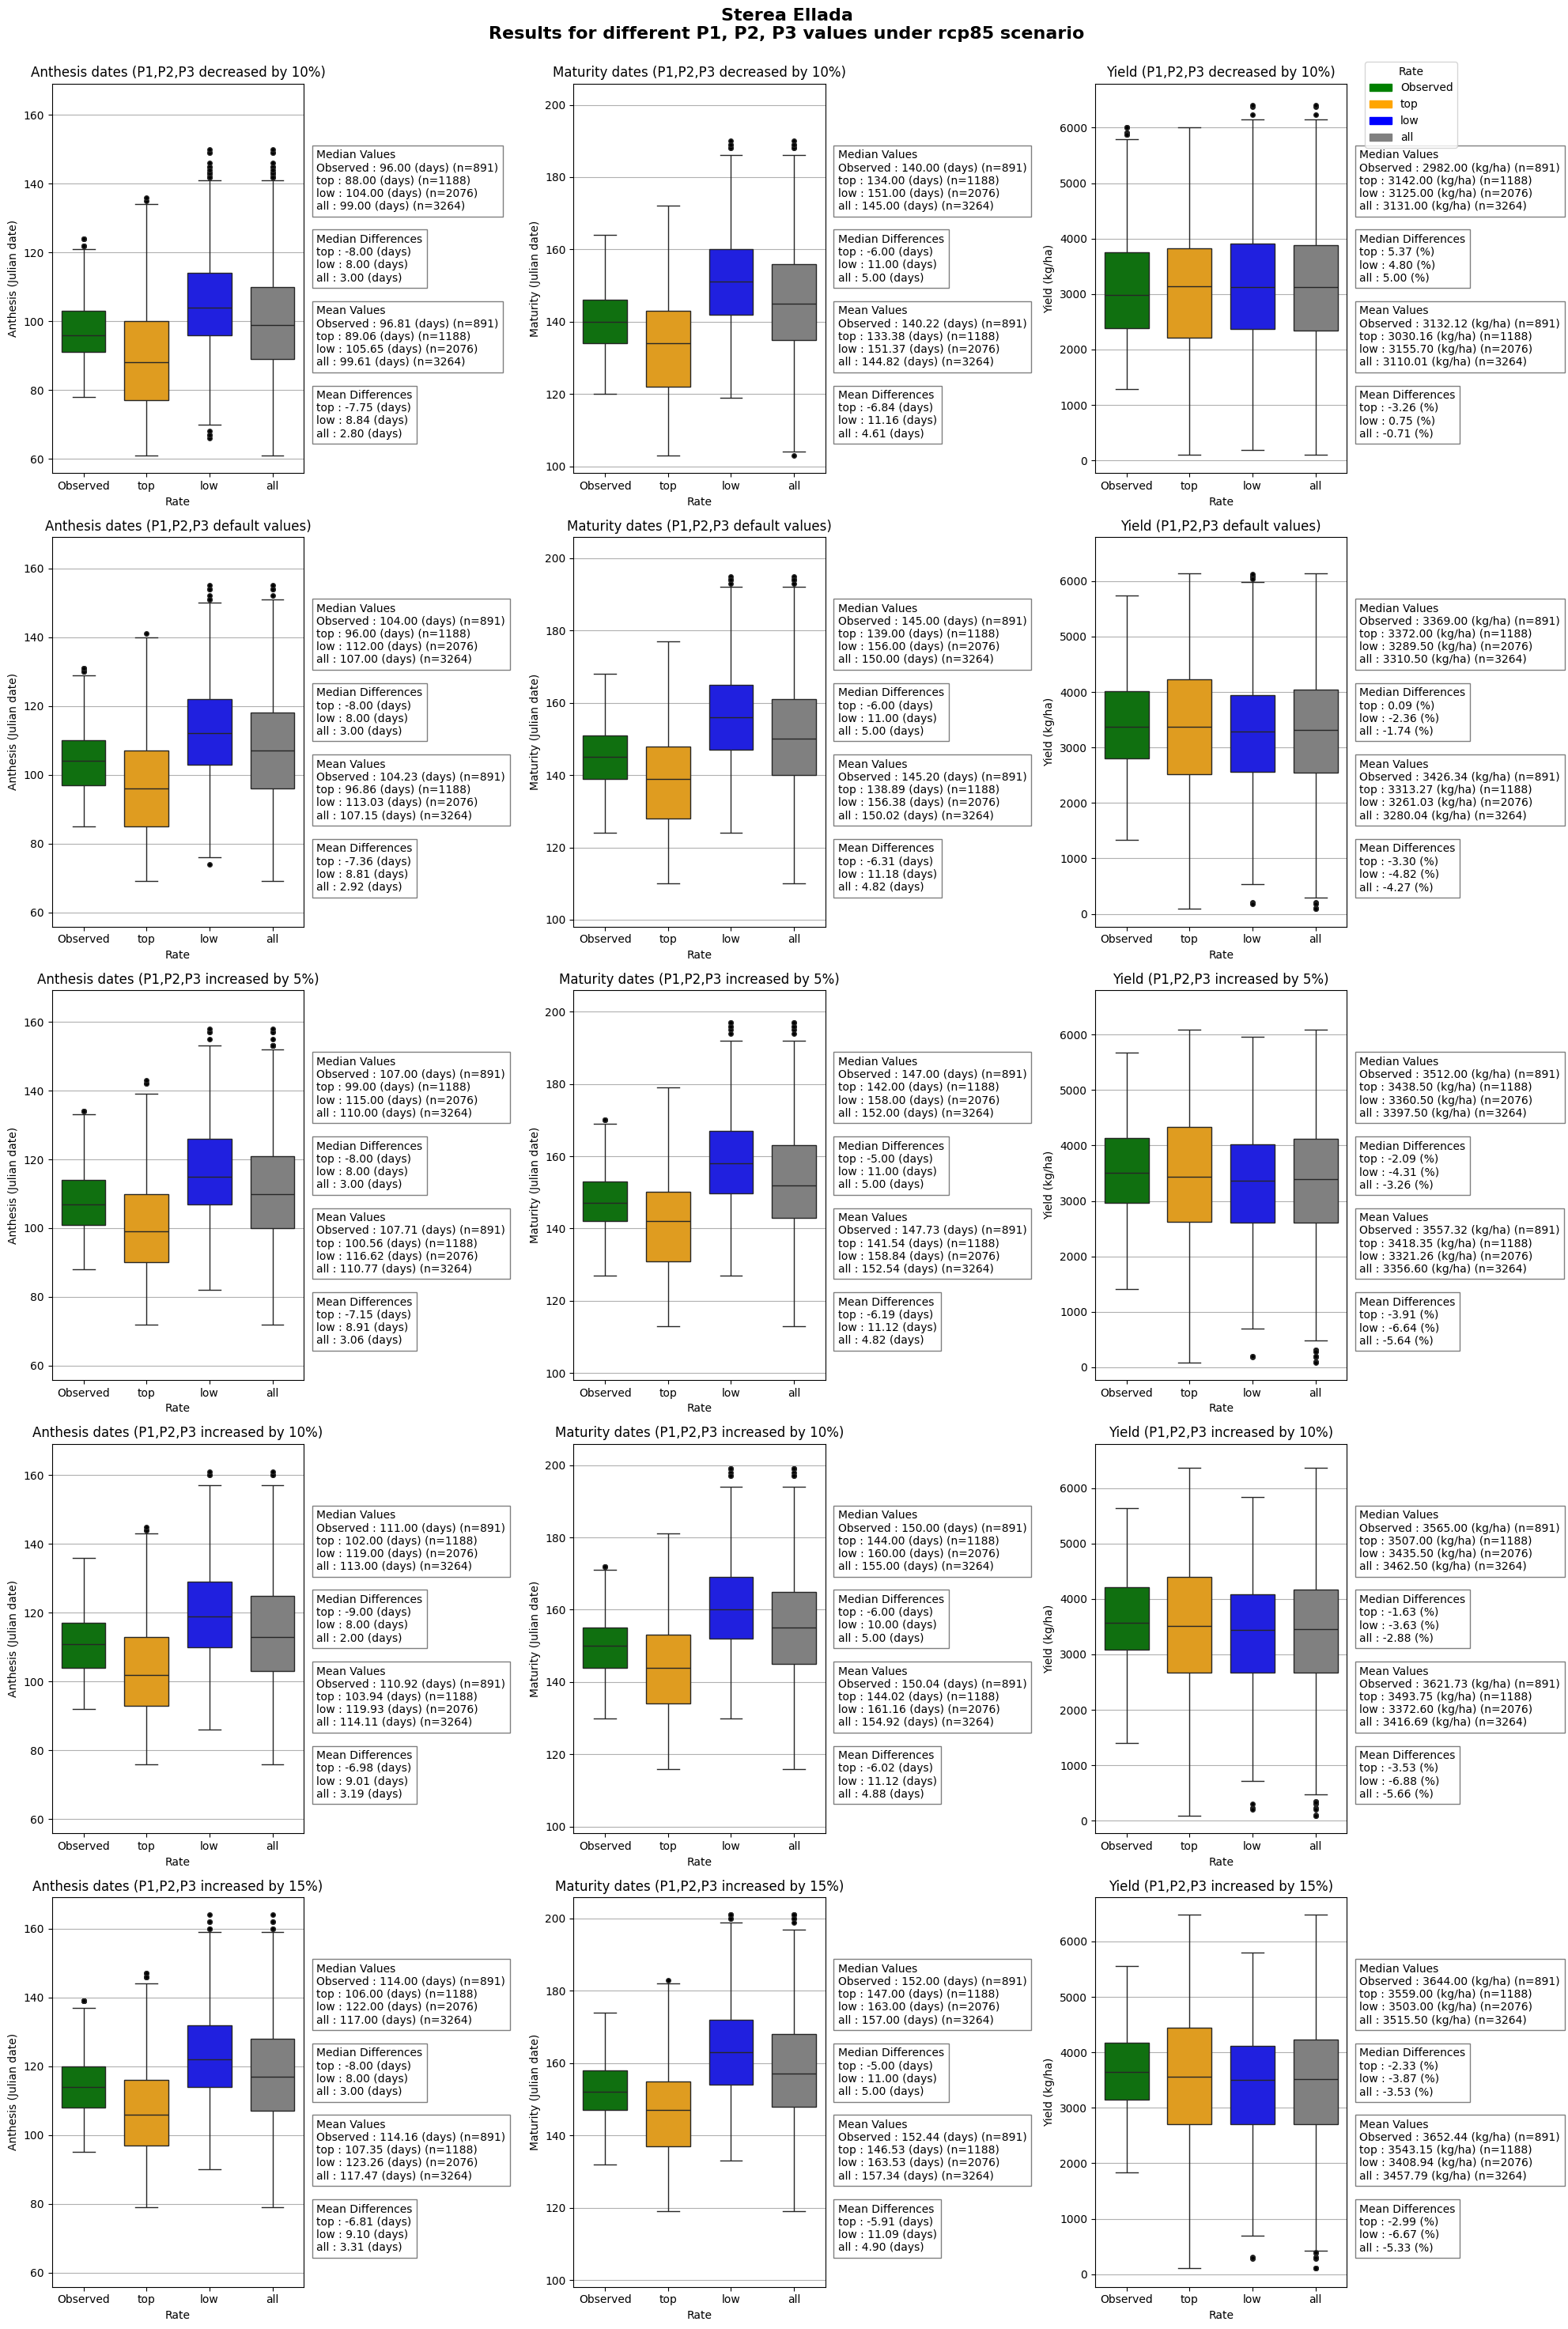

In [ ]:
#%%script echo skipping
#@title Boxplotrs για κάθε Rate (top, low, all, observed) για χωριστά τα decrease P1 P2 P3 από το συνδυασμένο csv αρχείο σε ένα διάγραμμα για κάθε scenario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv

# Initialize lists to store mean and median values for the CSV
csv_data = []

# Load the Meteo data
meteo_data = pd.read_csv('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv')
scenario_rcp='rcp85'
# Filtered dataframes
filtered_meteo = meteo_data[(meteo_data['Source'] == 'Meteo') & (meteo_data['Scenario'] == 'Meteo')]
filtered_pdatem10= meteo_data[(meteo_data['Source'] == 'EuroCordex') & (meteo_data['Scenario'] == scenario_rcp)& (meteo_data['P1P2P3'] == 'minus 10%')]
filtered_pdate00 = meteo_data[(meteo_data['Source'] == 'EuroCordex') & (meteo_data['Scenario'] == scenario_rcp)& (meteo_data['P1P2P3'] == 'original')]
filtered_pdatep5= meteo_data[(meteo_data['Source'] == 'EuroCordex') & (meteo_data['Scenario'] == scenario_rcp)& (meteo_data['P1P2P3'] == 'plus 5%')]
filtered_pdatep10= meteo_data[(meteo_data['Source'] == 'EuroCordex') & (meteo_data['Scenario'] == scenario_rcp)& (meteo_data['P1P2P3'] == 'plus 10%')]
filtered_pdatep15= meteo_data[(meteo_data['Source'] == 'EuroCordex') & (meteo_data['Scenario'] == scenario_rcp)& (meteo_data['P1P2P3'] == 'plus 15%')]

comb_pdatem10 = pd.concat([filtered_meteo[(meteo_data['P1P2P3'] == 'minus 10%')], filtered_pdatem10])
comb_pdate00 = pd.concat([filtered_meteo[(meteo_data['P1P2P3'] == 'original')], filtered_pdate00])
comb_pdatep5 = pd.concat([filtered_meteo[(meteo_data['P1P2P3'] == 'plus 5%')], filtered_pdatep5])
comb_pdatep10 = pd.concat([filtered_meteo[(meteo_data['P1P2P3'] == 'plus 10%')], filtered_pdatep10])
comb_pdatep15 = pd.concat([filtered_meteo[(meteo_data['P1P2P3'] == 'plus 15%')], filtered_pdatep15])
# List of combined dataframes
combined_dataframes = [comb_pdatem10, comb_pdate00, comb_pdatep5, comb_pdatep10,comb_pdatep15]

# List of scenario names
scenario_names = ['decreased by 10%', 'default values', 'increased by 5%','increased by 10%', 'increased by 15%']

# List of variable names
variable_names = ['ADAT_day', 'MDAT_day', 'HWAM']

# Custom palette with the desired order
custom_palette = {'Observed': 'green', 'top': 'orange', 'low': 'blue', 'all': 'grey'}

# List of hue order to ensure the desired order in the legend
hue_order = ['Meteo', 'EuroCordex']

# List of category order for the x-axis
x_axis_order = ['Observed', 'top', 'low', 'all']

legend_handles = [
    mpatches.Patch(color=color, label=rate)
    for rate, color in custom_palette.items()
]

# Determine y-axis limits for each variable with padding
y_limits = {}
for variable in variable_names:
    all_data = pd.concat([df[variable] for df in combined_dataframes])
    # If the variable is 'ADAT_day', filter out values > 200
    if variable == 'ADAT_day':
        all_data = all_data[all_data <= 250]
    y_min, y_max = all_data.min(), all_data.max()
    padding = 0.05 * (y_max - y_min)  # 5% extra space
    y_limits[variable] = (y_min - padding, y_max + padding)

# Create a figure with 3x3 subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 30))

for i, (combined_df, scenario) in enumerate(zip(combined_dataframes, scenario_names)):
    # Concatenating 'top' and 'low' rows
    new_df = pd.concat([combined_df[combined_df['Rate'] == 'top'], combined_df[combined_df['Rate'] == 'low']], ignore_index=True)

    # Replacing 'Rate' column values with 'all'
    combined_df.loc[combined_df['Rate'] != 'Observed', 'Rate'] = 'all'

    # Concatenating 'top' and 'low' rows again with modified 'Rate' values
    new_df2 = pd.concat([new_df, combined_df], ignore_index=True)

    for j, variable in enumerate(variable_names):
        ax = axs[i, j]
        sns.boxplot(x='Rate', y=variable, data=new_df2, palette=custom_palette, order=x_axis_order, showfliers=True, ax=ax,
                    flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 4}, width=0.7)
        ax.yaxis.grid(True)

        # Set consistent y-axis limits with padding
        ax.set_ylim(y_limits[variable])

        # Annotate median and mean values
        median_values = {}
        mean_values = {}
        set_sizes = {}
        for rate in x_axis_order:
            box_data = new_df2[new_df2['Rate'] == rate][variable]
            median = box_data.median()
            mean = box_data.mean()
            size = len(box_data)

            median_values[rate] = float(median)
            mean_values[rate] = float(mean)
            set_sizes[rate] = size

        # Add a box outside the plot for Median
        unit = '(days)' if variable in ['ADAT_day', 'MDAT_day'] else '(kg/ha)'
        median_box_text = '\n'.join([f'{rate} : {median:.2f} {unit} (n={set_sizes[rate]})' for rate, median in median_values.items()])
        ax.text(1.05, 0.75, f'Median Values\n{median_box_text}', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center')

         # Calculate differences of Median results between top, low, and all with observed
        observed_median = median_values['Observed']
        unit = '(days)' if variable in ['ADAT_day', 'MDAT_day'] else '(%)'
        #differences_text = '\n'.join([f'{rate} : {median - observed_median:.2f} {unit}' for rate, median in median_values.items() if rate != 'Observed'])
        if variable == 'HWAM':
            differences_text = '\n'.join([f'{rate} : {(median - observed_median)*100 / observed_median:.2f} {unit}' for rate, median in median_values.items() if rate != 'Observed'])
        else:
            differences_text = '\n'.join([f'{rate} : {median - observed_median:.2f} {unit}' for rate, median in median_values.items() if rate != 'Observed'])
        ax.text(1.05, 0.55, f'Median Differences\n{differences_text}', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center')

        # Add a box outside the plot for Mean
        unit = '(days)' if variable in ['ADAT_day', 'MDAT_day'] else '(kg/ha)'
        mean_box_text = '\n'.join([f'{rate} : {mean:.2f} {unit} (n={set_sizes[rate]})' for rate, mean in mean_values.items()])
        ax.text(1.05, 0.35, f'Mean Values\n{mean_box_text}', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center')

        # Calculate differences of Mean results between top, low, and all with observed
        observed_mean = mean_values['Observed']
        unit = '(days)' if variable in ['ADAT_day', 'MDAT_day'] else '(%)'
        if variable == 'HWAM':
            differences_text = '\n'.join([f'{rate} : {(mean - observed_mean)*100 / observed_mean:.2f} {unit}' for rate, mean in mean_values.items() if rate != 'Observed'])
        else:
            differences_text = '\n'.join([f'{rate} : {mean - observed_mean:.2f} {unit}' for rate, mean in mean_values.items() if rate != 'Observed'])
        ax.text(1.05, 0.15, f'Mean Differences\n{differences_text}', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), verticalalignment='center')

        # Update the y-axis label and plot title based on the variable
        if variable == 'ADAT_day':
            ax.set_title(f'Anthesis dates (P1,P2,P3 {scenario})')
            ax.set_ylabel('Anthesis (Julian date)')
        elif variable == 'MDAT_day':
            ax.set_title(f'Maturity dates (P1,P2,P3 {scenario})')
            ax.set_ylabel('Maturity (Julian date)')
        else:
            ax.set_title(f'Yield (P1,P2,P3 {scenario})')
            ax.set_ylabel('Yield (kg/ha)')


         # Store data in a list for writing to CSV
        for rate in x_axis_order:
            csv_data.append({
                'Scenario': scenario,
                'Variable': variable,
                'Rate': rate,
                'Median': median_values[rate],
                'Mean': mean_values[rate],
                'Sample Size': set_sizes[rate],
                'Scenario Type': scenario_rcp
            })

        #ax.set_title(f'{variable.upper()} ({scenario}/{scenario_rcp})')
        #ax.set_xlabel('Rate')

        if i == 0 and j == 2:
            ax.legend(handles=legend_handles, title='Rate', bbox_to_anchor=(1.05, 1.07), loc='upper left')
# Add a title for the entire plot
plt.suptitle(f'Sterea Ellada\nResults for different P1, P2, P3 values under {scenario_rcp} scenario', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust rect to make space for the suptitle
# Adjust layout
#plt.tight_layout()

# Save the plot
plt.savefig('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/boxplots_combined_'+scenario_rcp+'_pdated.png')

# Show plots
plt.show()

# Save the collected data to a CSV file
csv_columns = ['Scenario', 'Variable', 'Rate', 'Median', 'Mean', 'Sample Size', 'Scenario Type']
csv_file = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/mean_median_values_' + scenario_rcp + '.csv'
try:
    with open(csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in csv_data:
            writer.writerow(data)
except IOError:
    print("I/O error")

In [ ]:
%%script echo skipping
#@title Regression plots για κάθε Rate (top, low, all, observed) για χωριστά τα pdate από το συνδυασμένο csv αρχείο σε ένα διάγραμμα για κάθε scenario
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to calculate metrics
def plot_regression_line_and_equation(x, y, label, color, ax):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    line_x = np.linspace(x.min(), x.max(), 100)
    line_y = model.predict(line_x.reshape(-1, 1))

    # Plot regression line
    ax.plot(line_x, line_y, color=color, linestyle='--', label=f'{label} Line')

    # Display equation with custom position
    slope = model.coef_[0]
    intercept = model.intercept_
    equation = f"{label}: {slope:.4f}*Elevation + {intercept:.2f}"
    return equation

# Directory containing CSV files
DSSAT_directory = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED'
os.makedirs(DSSAT_directory, exist_ok=True)

combined_file_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv'
graphs_path = '/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs'
df2 = pd.read_csv(combined_file_path)

# List of PDATEs to include
pdates = ['original', 'plus 5%', 'plus 10%', 'plus 15%']

# The scenario of interest
scenario = 'rcp85'

# Custom palette with 'top' as green and 'low' as deep red
custom_palette = {'top': 'green', 'low': '#8B0000', 'Observed':'orange'}

# Mapping of variables to y-axis labels
variable_labels = {'ADAT_day': 'Anthesis (Julian date)',
                   'MDAT_day': 'Maturity (Julian date)',
                   'HWAM': 'Yield (kg/ha)'}

# Generate plots for each PDATE
fig, axes = plt.subplots(len(pdates), len(variable_labels), figsize=(18, 6 * len(pdates)), sharex=True)

# Ensure axes is always a 2D array for easy indexing
if len(pdates) == 1:
    axes = [axes]

for pdate_idx, pdate in enumerate(pdates):
    df = df2[df2['P1P2P3'] == pdate]

    for column_idx, (column, ylabel) in enumerate(variable_labels.items()):
        ax = axes[pdate_idx][column_idx]

        # Filter data for the specific scenario
        scenario_df = df[df['Scenario'] == scenario]

        # Calculate sizes for each scenario and PDATE
        size_top = len(scenario_df[scenario_df['Rate'] == 'top'])
        size_low = len(scenario_df[scenario_df['Rate'] == 'low'])
        size_observed = len(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')])

        # Create scatter plot for 'top' Rate
        sns.scatterplot(x='Elevation', y=column, data=scenario_df[scenario_df['Rate'] == 'top'],
                        color='green', label=f'Top Rate (n={size_top})', s=80, alpha=0.7, edgecolor='green', marker='o', ax=ax)
        equation_top = plot_regression_line_and_equation(scenario_df[scenario_df['Rate'] == 'top']['Elevation'],
                                                         scenario_df[scenario_df['Rate'] == 'top'][column],
                                                         'Top', 'green', ax)

        # Create scatter plot for 'low' Rate
        sns.scatterplot(x='Elevation', y=column, data=scenario_df[scenario_df['Rate'] == 'low'],
                        color='#8B0000', label=f'Low Rate (n={size_low})', s=20, alpha=0.7, edgecolor='#8B0000', marker='o', ax=ax)
        equation_low = plot_regression_line_and_equation(scenario_df[scenario_df['Rate'] == 'low']['Elevation'],
                                                         scenario_df[scenario_df['Rate'] == 'low'][column],
                                                         'Low', '#8B0000', ax)

        # Create scatter plot for 'Observed' Rate
        sns.scatterplot(x='Elevation', y=column, data=df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')],
                        color='orange', label=f'Observed (n={size_observed})', s=30, alpha=0.5, edgecolor='black', marker='d', ax=ax)
        equation_observed = plot_regression_line_and_equation(df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')]['Elevation'],
                                                              df[(df['Rate'] == 'Observed') & (df['Scenario'] == 'Meteo')][column],
                                                              'Observed', 'orange', ax)

        # Calculate and plot combined 'all' Rate
        all_df = np.concatenate([scenario_df[scenario_df['Rate'] == 'top'],
                                 scenario_df[scenario_df['Rate'] == 'low']])
        all_df = pd.DataFrame(all_df, columns=df.columns)  # Convert to DataFrame
        all_df['Rate'] = 'all'
        equation_all = plot_regression_line_and_equation(all_df['Elevation'], all_df[column],
                                                         'All data', 'gray', ax)

        ax.set_title(f'{ylabel} - {pdate} / {scenario}')
        ax.set_xlabel('Elevation (m)')
        ax.set_ylabel(ylabel)

        # Set x-axis ticks as integers and rotate them by 45 degrees
        ax.set_xticks(df['Elevation'].unique().astype(int))
        ax.set_xticklabels(df['Elevation'].unique().astype(int), rotation=45, fontsize=8)

        # Make y-axis tick labels smaller
        ax.tick_params(axis='y', labelsize=8)

        # Adding the equations as annotations
        ax.annotate(equation_top, xy=(0.4, 0.98), xycoords='axes fraction', fontsize=9, color='green', verticalalignment='top')
        ax.annotate(equation_low, xy=(0.4, 0.95), xycoords='axes fraction', fontsize=9, color='#8B0000', verticalalignment='top')
        ax.annotate(equation_observed, xy=(0.4, 0.89), xycoords='axes fraction', fontsize=9, color='orange', verticalalignment='top')
        ax.annotate(equation_all, xy=(0.4, 0.92), xycoords='axes fraction', fontsize=9, color='gray', verticalalignment='top')

        # Adjust legend to bottom right
        ax.legend(loc='lower right', prop={'size': 8})

        # Adjust y-axis limits to add space at the top
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min- 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))  # Add 10% extra space at the top

plt.tight_layout()

# Save the combined plot
plot_filename = f'combined_{scenario}_Elevation_scatter.png'
plot_filepath = os.path.join(graphs_path, plot_filename)
plt.savefig(plot_filepath, dpi=600)
plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Linecharts για κάθε Rate (top, low, all, observed) για χωριστά τα pdate από το συνδυασμένο csv αρχείο σε ένα διάγραμμα για κάθε scenario
import pandas as pd
import matplotlib.pyplot as plt

# Load the Meteo data
df = pd.read_csv('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv')

# List of RCP scenarios to process
rcp_scenarios = ['rcp26', 'rcp45', 'rcp85']  # Add or modify RCP scenarios as needed

# Define colors, line styles, and widths for each line
line_styles = {
    'Observed': '-',
    'top': ':',
    'low': ':',
    'all': ':'
}
line_widths = {
    'Observed': 2,
    'top': 1.5,
    'low': 1.5,
    'all': 1.5
}
colors = {
    'Observed': 'red',
    'top': 'blue',
    'low': 'orange',
    'all': 'grey'
}

# List of variables to plot
variables = ['ADAT_day', 'MDAT_day', 'HWAM']
# Define the rates list
rates = ['Observed', 'top', 'low']
# Iterate over each RCP scenario
for scenario_rcp in rcp_scenarios:
    # Filtered dataframes for the 'Meteo' and 'EuroCordex' sources
    filtered_meteo = df[(df['Source'] == 'Meteo') & (df['Scenario'] == 'Meteo')]
    filtered_pdate15 = df[(df['Source'] == 'EuroCordex') & (df['Scenario'] == scenario_rcp) & (df['PDATE'] == 'Nov 15')]
    filtered_pdate01 = df[(df['Source'] == 'EuroCordex') & (df['Scenario'] == scenario_rcp) & (df['PDATE'] == 'Dec 01')]
    filtered_pdate16 = df[(df['Source'] == 'EuroCordex') & (df['Scenario'] == scenario_rcp) & (df['PDATE'] == 'Dec 16')]

    # Combine PDATEs for comparison
    comb_pdate15 = pd.concat([filtered_meteo[filtered_meteo['PDATE'] == 'Nov 15'], filtered_pdate15])
    comb_pdate01 = pd.concat([filtered_meteo[filtered_meteo['PDATE'] == 'Dec 01'], filtered_pdate01])
    comb_pdate16 = pd.concat([filtered_meteo[filtered_meteo['PDATE'] == 'Dec 16'], filtered_pdate16])

    # List of combined dataframes
    combined_dataframes = [comb_pdate15, comb_pdate01, comb_pdate16]
    scenario_names = ['Nov 15', 'Dec 01', 'Dec 16']

    # Iterate over each variable
    for variable in variables:
        # Prepare a dictionary to store mean values
        mean_values = {rate: [] for rate in rates}
        mean_values['all'] = []

        # Calculate mean values for the current variable
        for combined_df, scenario in zip(combined_dataframes, scenario_names):
            for rate in rates:
                # Filter data for the current rate and calculate the mean
                rate_mean = combined_df[combined_df['Rate'] == rate][variable].mean()
                mean_values[rate].append(rate_mean)

            # Calculate the mean for 'all' as the mean of all rows excluding 'Observed'
            all_mean = combined_df[combined_df['Rate'] != 'Observed'][variable].mean()
            mean_values['all'].append(all_mean)

        # Plotting the line chart for the current variable
        plt.figure(figsize=(12, 6))

        # Plot a line for each rate's mean values with specified colors, line styles, and widths
        for rate, means in mean_values.items():
            plt.plot(
                scenario_names,
                means,
                marker='o',
                label=rate,
                color=colors[rate],
                linestyle=line_styles[rate],
                linewidth=line_widths[rate]
            )

        # Add percentage data labels for HWAM
        if variable == 'HWAM':
            for i, scenario in enumerate(scenario_names):
                observed_mean = mean_values['Observed'][i]
                for rate in ['top', 'low', 'all']:
                    if mean_values[rate][i] is not None:
                        percentage_difference = (mean_values[rate][i] - observed_mean) * 100 / observed_mean
                        if percentage_difference != 0:  # Only label if the difference is not zero
                          if rate=='top':
                            plt.text(
                                scenario,
                                mean_values[rate][i] - 2.5,  # Adjusted position to be slightly higher
                                f'{int(percentage_difference)}%',
                                color='black',
                                fontsize=10,
                                ha='right',
                                va='top'
                            )
                          elif rate=='low':
                            plt.text(
                                scenario,
                                mean_values[rate][i] + 2.5,  # Adjusted position to be slightly higher
                                f'{int(percentage_difference)}%',
                                color='black',
                                fontsize=10,
                                ha='left',
                                va='bottom'
                            )
                          else:
                            plt.text(
                                scenario,
                                mean_values[rate][i] + 0.5,  # Adjusted position to be slightly higher
                                f'{int(percentage_difference)}%',
                                color='black',
                                fontsize=10,
                                ha='right',
                                va='bottom'
                            )
        else:
          for i, scenario in enumerate(scenario_names):
            observed_mean = mean_values['Observed'][i]
            for rate in ['top', 'low', 'all']:
                if mean_values[rate][i] is not None:
                    difference = mean_values[rate][i] - observed_mean
                    if difference != 0:  # Only label if the difference is not zero

                        plt.text(
                            scenario,
                            mean_values[rate][i] + 0.5,  # Adjusted position to be slightly higher
                            f'{int(difference)}',
                            color='black',
                            fontsize=10,
                            ha='right',
                            va='bottom'
                        )


        # Add labels and title
        plt.xlabel('Planting Date')
        if variable =='ADAT_day':
            plt.ylabel('Anthesis (Julian date)')
            plt.title(f'Anthesis Values for {scenario_rcp}')
        elif variable =='MDAT_day':
            plt.ylabel('Maturity (Julian date)')
            plt.title(f'Maturity Values for {scenario_rcp}')
        else:
            plt.ylabel('Yield (kg/ha)')
            plt.title(f'Yield Values for {scenario_rcp}')

        #plt.title(f'{variable} Values for {scenario_rcp}')
        plt.grid(True)

        # Place legend outside the plot
        plt.legend(title='Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Adjust layout to accommodate the legend
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        # Save the plot
        plt.savefig(f'/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/Linechart_{variable}_values_{scenario_rcp}.png')

        # Show the plot
        plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Linecharts για κάθε Rate (top, low, all, observed) για χωριστά τα Elevations από το συνδυασμένο csv αρχείο σε ένα διάγραμμα για κάθε scenario
import pandas as pd
import matplotlib.pyplot as plt

# Load the Meteo data
df = pd.read_csv('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv')

# List of RCP scenarios to process
rcp_scenarios = ['rcp26', 'rcp45', 'rcp85']  # Add or modify RCP scenarios as needed

# Define colors, line styles, and widths for each line
line_styles = {
    'Observed': '-',
    'top': ':',
    'low': ':',
    'all': ':'
}
line_widths = {
    'Observed': 2,
    'top': 1.5,
    'low': 1.5,
    'all': 1.5
}
colors = {
    'Observed': 'red',
    'top': 'blue',
    'low': 'orange',
    'all': 'grey'
}

# Define the rates list
rates = ['Observed', 'top', 'low']

# List of variables to plot
variables = ['ADAT_day', 'MDAT_day', 'HWAM']

# Iterate over each RCP scenario
for scenario_rcp in rcp_scenarios:
    # Filtered dataframes for the 'Meteo' and 'EuroCordex' sources
    filtered_meteo = df[(df['Source'] == 'Meteo') & (df['Scenario'] == 'Meteo')]
    filtered_rcp = df[(df['Source'] == 'EuroCordex') & (df['Scenario'] == scenario_rcp)]

    # Combine data for comparison
    combined_df = pd.concat([filtered_meteo, filtered_rcp])

    # Get unique elevation values and sort them
    elevation_values = sorted(combined_df['Elevation'].unique())

    # Iterate over each variable
    for variable in variables:
        # Prepare a dictionary to store mean values
        mean_values = {rate: [] for rate in rates}
        mean_values['all'] = []

        # Calculate mean values for the current variable across elevations
        for elevation in elevation_values:
            elevation_df = combined_df[combined_df['Elevation'] == elevation]
            for rate in rates:
                # Filter data for the current rate and calculate the mean
                rate_mean = elevation_df[elevation_df['Rate'] == rate][variable].mean()
                mean_values[rate].append(rate_mean)

            # Calculate the mean for 'all' as the mean of all rows excluding 'Observed'
            all_mean = elevation_df[elevation_df['Rate'] != 'Observed'][variable].mean()
            mean_values['all'].append(all_mean)

        # Plotting the line chart for the current variable
        plt.figure(figsize=(12, 6))

        # Plot a line for each rate's mean values with specified colors, line styles, and widths
        for rate, means in mean_values.items():
            # Ensure the elevation values and means are sorted
            sorted_elevation_values = [e for e in elevation_values]
            sorted_means = [mean for _, mean in sorted(zip(elevation_values, means))]
            plt.plot(
                sorted_elevation_values,
                sorted_means,
                marker='o',
                label=rate,
                color=colors[rate],
                linestyle=line_styles[rate],
                linewidth=line_widths[rate]
            )

        # Add percentage data labels for HWAM
        if variable == 'HWAM':
            for i, elevation in enumerate(elevation_values):
                observed_mean = mean_values['Observed'][i]
                for rate in ['top', 'low', 'all']:
                    if mean_values[rate][i] is not None:
                        percentage_difference = (mean_values[rate][i] - observed_mean) * 100 / observed_mean
                        if percentage_difference != 0:  # Only label if the difference is not zero
                            plt.text(
                                elevation,
                                mean_values[rate][i] +0.5,  # Adjusted position to be lower
                                f'{int(percentage_difference)}%',
                                color='black',
                                fontsize=10,
                                ha='center',  # Center text horizontally
                                va='bottom'  # Adjust vertical alignment to the top of the label
                            )
        else:
            for i, elevation in enumerate(elevation_values):
                observed_mean = mean_values['Observed'][i]
                for rate in ['top', 'low', 'all']:
                    if mean_values[rate][i] is not None:
                        difference = mean_values[rate][i] - observed_mean
                        if difference != 0:  # Only label if the difference is not zero
                            plt.text(
                                elevation,
                                mean_values[rate][i] +0.5,  # Adjusted position to be lower
                                f'{int(difference)}',
                                color='black',
                                fontsize=10,
                                ha='center',  # Center text horizontally
                                va='bottom'  # Adjust vertical alignment to the top of the label
                            )

        # Add labels and title
        plt.xlabel('Elevation (m)')
        if variable == 'ADAT_day':
            plt.ylabel('Anthesis (Julian date)')
            plt.title(f'Anthesis Values for {scenario_rcp}')
        elif variable == 'MDAT_day':
            plt.ylabel('Maturity (Julian date)')
            plt.title(f'Maturity Values for {scenario_rcp}')
        else:
            plt.ylabel('Yield (kg/ha)')
            plt.title(f'Yield Values for {scenario_rcp}')

        plt.grid(True)

        # Place legend outside the plot
        plt.legend(title='Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Adjust layout to accommodate the legend
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        # Save the plot
        plt.savefig(f'/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/Linecharts/Linechart_{variable}_values_{scenario_rcp}_elevation.png')

        # Show the plot
        plt.show()


skipping


In [ ]:
%%script echo skipping
#@title Linecharts για κάθε Rate (top, low, all, observed) για χωριστά τα Elevations (Dec 01) από το συνδυασμένο csv αρχείο σε ένα διάγραμμα για κάθε scenario
import pandas as pd
import matplotlib.pyplot as plt

# Load the Meteo data
df = pd.read_csv('/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/combined_data_with_pdate.csv')

# List of RCP scenarios to process
rcp_scenarios = ['rcp26', 'rcp45', 'rcp85']  # Add or modify RCP scenarios as needed

# Define colors, line styles, and widths for each line
line_styles = {
    'Observed': '-',
    'top': ':',
    'low': ':',
    'all': ':'
}
line_widths = {
    'Observed': 2,
    'top': 1.5,
    'low': 1.5,
    'all': 1.5
}
colors = {
    'Observed': 'red',
    'top': 'blue',
    'low': 'orange',
    'all': 'grey'
}

# Define the rates list
rates = ['Observed', 'top', 'low']

# List of variables to plot
variables = ['ADAT_day', 'MDAT_day', 'HWAM']

# Iterate over each RCP scenario
for scenario_rcp in rcp_scenarios:
    # Filtered dataframes for the 'Meteo' and 'EuroCordex' sources
    filtered_meteo = df[(df['Source'] == 'Meteo') & (df['Scenario'] == 'Meteo')]
    filtered_pdate01 = df[(df['Source'] == 'EuroCordex') & (df['Scenario'] == scenario_rcp) & (df['PDATE'] == 'Dec 01')]

    # Combine data for Dec 01
    combined_df = pd.concat([filtered_meteo[filtered_meteo['PDATE'] == 'Dec 01'], filtered_pdate01])

    # Get unique elevation values and sort them
    elevation_values = sorted(combined_df['Elevation'].unique())

    # Iterate over each variable
    for variable in variables:
        # Prepare a dictionary to store mean values
        mean_values = {rate: [] for rate in rates}
        mean_values['all'] = []

        # Calculate mean values for the current variable across elevations
        for elevation in elevation_values:
            elevation_df = combined_df[combined_df['Elevation'] == elevation]
            for rate in rates:
                # Filter data for the current rate and calculate the mean
                rate_mean = elevation_df[elevation_df['Rate'] == rate][variable].mean()
                mean_values[rate].append(rate_mean)

            # Calculate the mean for 'all' as the mean of all rows excluding 'Observed'
            all_mean = elevation_df[elevation_df['Rate'] != 'Observed'][variable].mean()
            mean_values['all'].append(all_mean)

        # Plotting the line chart for the current variable
        plt.figure(figsize=(12, 6))

        # Plot a line for each rate's mean values with specified colors, line styles, and widths
        for rate, means in mean_values.items():
            # Ensure the elevation values and means are sorted
            sorted_elevation_values = [e for e in elevation_values]
            sorted_means = [mean for _, mean in sorted(zip(elevation_values, means))]
            plt.plot(
                sorted_elevation_values,
                sorted_means,
                marker='o',
                label=rate,
                color=colors[rate],
                linestyle=line_styles[rate],
                linewidth=line_widths[rate]
            )

        # Add percentage data labels for HWAM
        if variable == 'HWAM':
            for i, elevation in enumerate(elevation_values):
                observed_mean = mean_values['Observed'][i]
                for rate in ['top', 'low', 'all']:
                    if mean_values[rate][i] is not None:
                        percentage_difference = (mean_values[rate][i] - observed_mean) * 100 / observed_mean
                        if percentage_difference != 0:  # Only label if the difference is not zero
                            plt.text(
                                elevation,
                                mean_values[rate][i] - 2.5,  # Adjusted position to be lower
                                f'{int(percentage_difference)}%',
                                color='black',
                                fontsize=10,
                                ha='center',  # Center text horizontally
                                va='top'  # Adjust vertical alignment to the top of the label
                            )
        else:
            for i, elevation in enumerate(elevation_values):
                observed_mean = mean_values['Observed'][i]
                for rate in ['top', 'low', 'all']:
                    if mean_values[rate][i] is not None:
                        difference = mean_values[rate][i] - observed_mean
                        if difference != 0:  # Only label if the difference is not zero
                            plt.text(
                                elevation,
                                mean_values[rate][i] - 2.5,  # Adjusted position to be lower
                                f'{int(difference)}',
                                color='black',
                                fontsize=10,
                                ha='center',  # Center text horizontally
                                va='top'  # Adjust vertical alignment to the top of the label
                            )

        # Add labels and title
        plt.xlabel('Elevation (m)')
        if variable == 'ADAT_day':
            plt.ylabel('Anthesis (Julian date)')
            plt.title(f'Anthesis Values for {scenario_rcp} - Dec 01')
        elif variable == 'MDAT_day':
            plt.ylabel('Maturity (Julian date)')
            plt.title(f'Maturity Values for {scenario_rcp} - Dec 01')
        else:
            plt.ylabel('Yield (kg/ha)')
            plt.title(f'Yield Values for {scenario_rcp} - Dec 01')

        plt.grid(True)

        # Place legend outside the plot
        plt.legend(title='Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Adjust layout to accommodate the legend
        plt.tight_layout(rect=[0, 0, 0.85, 1])

        # Save the plot
        plt.savefig(f'/content/drive/MyDrive/Comparisons/DSSAT_RESULTS_GEN_RAINFED/Graphs/Linecharts/Linechart_{variable}_values_{scenario_rcp}_Dec01_elevation.png')

        # Show the plot
        plt.show()


skipping
